In [ ]:
#Imported all the libraries I could think of.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor


In [ ]:
#Loaded the data as dt1.

dt1 = pd.read_csv('salary_prediction_data_1.csv')

Below I have checked the normal stuff about the data.

In [ ]:
dt1.head()

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175


In [ ]:
dt1.shape

(1000, 7)

In [ ]:
dt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Education   1000 non-null   object 
 1   Experience  1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Job_Title   1000 non-null   object 
 4   Age         1000 non-null   int64  
 5   Gender      1000 non-null   object 
 6   Salary      1000 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


In [ ]:
dt1.describe()

,Experience,Age,Salary
count,1000.000000,1000.000000,1000.000000
mean,14.771000,42.377000,105558.404239
std,8.341111,13.609412,28256.972075
min,1.000000,20.000000,33510.510669
25%,7.000000,30.000000,85032.141517
50%,15.000000,43.000000,104314.518315
75%,22.000000,55.000000,126804.047524
max,29.000000,64.000000,193016.602150


In [ ]:
print(dt1)

       Education  Experience  Location Job_Title  Age  Gender         Salary
0    High School           8     Urban   Manager   63    Male   84620.053665
1            PhD          11  Suburban  Director   59    Male  142591.255894
2       Bachelor          28  Suburban   Manager   61  Female   97800.255404
3    High School          29     Rural  Director   45    Male   96834.671282
4            PhD          25     Urban   Analyst   26  Female  132157.786175
..           ...         ...       ...       ...  ...     ...            ...
995  High School           8  Suburban   Analyst   25  Female   64683.389864
996  High School          24     Urban  Engineer   30  Female   74468.205020
997       Master          18     Rural   Analyst   44    Male   98207.026024
998     Bachelor          27  Suburban  Director   31  Female  108544.922720
999  High School          25     Urban  Director   41  Female   71077.000066

[1000 rows x 7 columns]


In [ ]:
dt1.isnull().sum()

,0
Education,0
Experience,0
Location,0
Job_Title,0
Age,0
Gender,0
Salary,0


In [ ]:
print("There is {} missing values in data frame".format(dt1.isnull().sum().sum()))

There is 0 missing values in data frame


In [ ]:
print("There is {} duplicated values in data frame".format(dt1.duplicated().sum()))

There is 0 duplicated values in data frame


As we can see there are no missing or null or duplicate values, I will now move on to the charty stuff of the numerical values.

In [ ]:
len(dt1.columns)

7

In [ ]:
numerical_columns = ['Experience', 'Age', 'Salary']

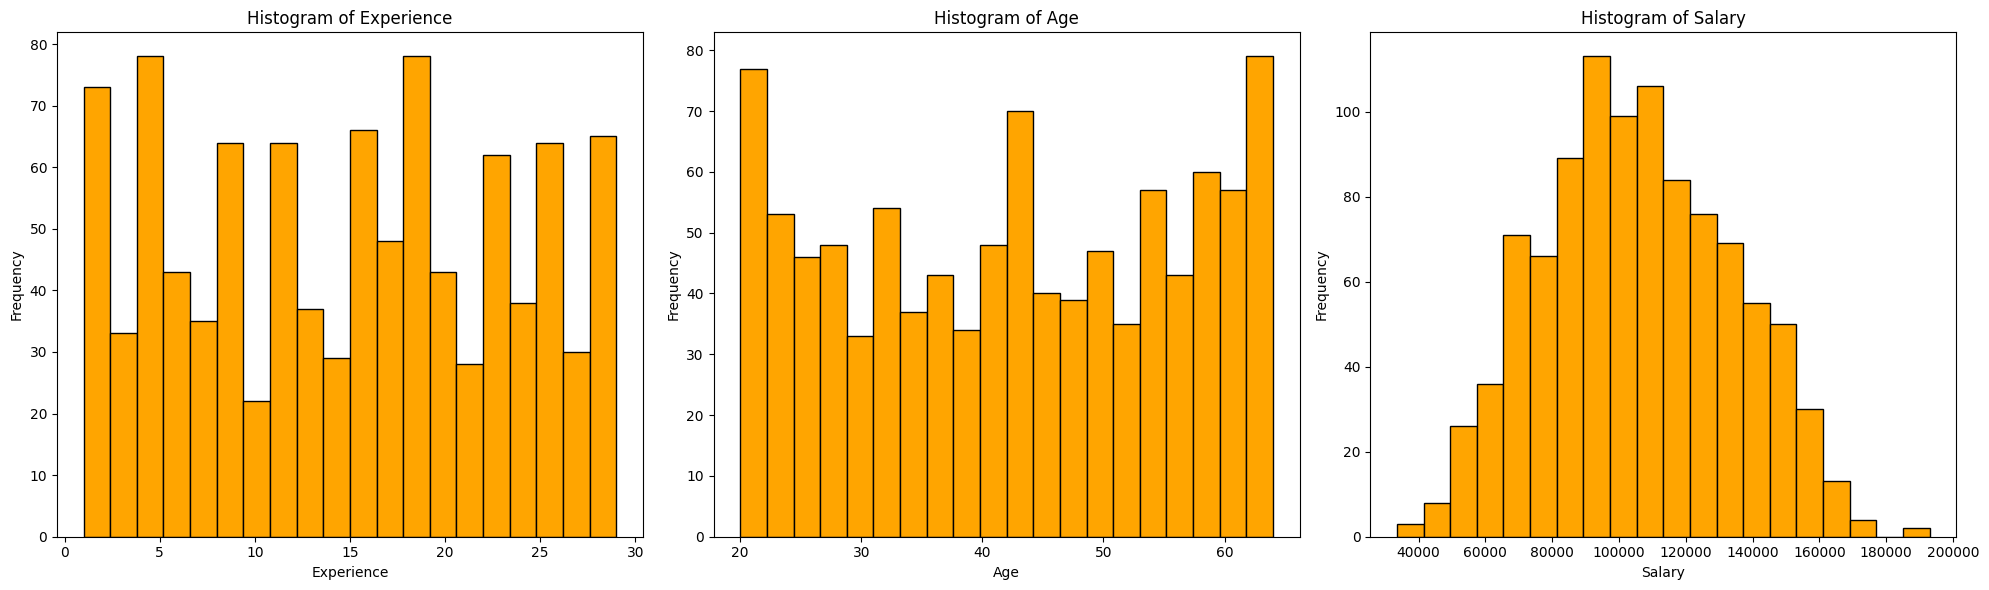

In [ ]:
#Created a histogram with the numericals only.

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

axes = axes.flatten()

for i, column in enumerate(numerical_columns):
        axes[i].hist(dt1[column], bins=20, color='orange', edgecolor='black')
        axes[i].set_title(f'Histogram of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Created histograms for numericals. Column charts for the other 4.

/tmp/ipython-input-408279350.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dt1, x='Education', palette='Set2')


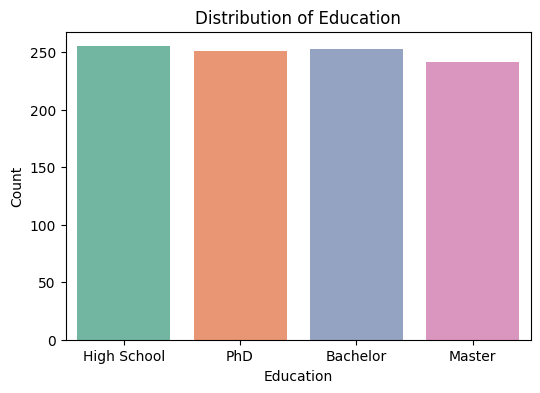

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=dt1, x='Education', palette='Set2')
plt.title('Distribution of Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-3609782827.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dt1, x='Job_Title', palette='Set2')


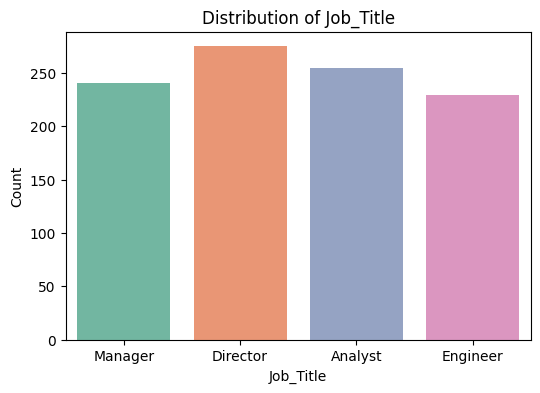

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=dt1, x='Job_Title', palette='Set2')
plt.title('Distribution of Job_Title')
plt.xlabel('Job_Title')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-3322293399.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dt1, x='Location', palette='Set2')


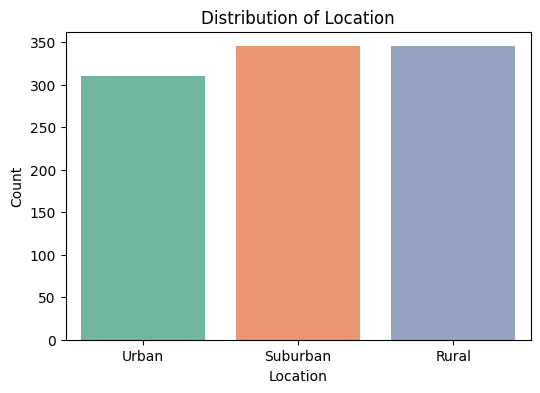

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=dt1, x='Location', palette='Set2')
plt.title('Distribution of Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-1977657242.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dt1, x='Gender', palette='Set2')


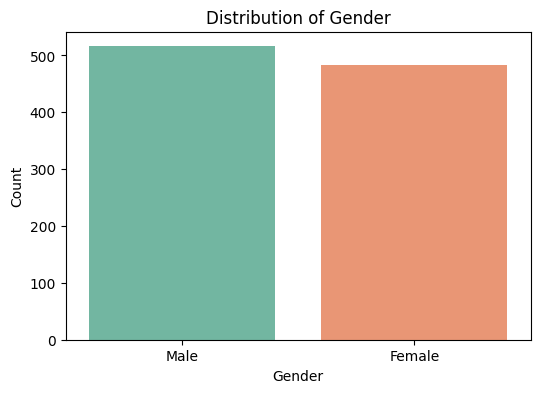

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=dt1, x='Gender', palette='Set2')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

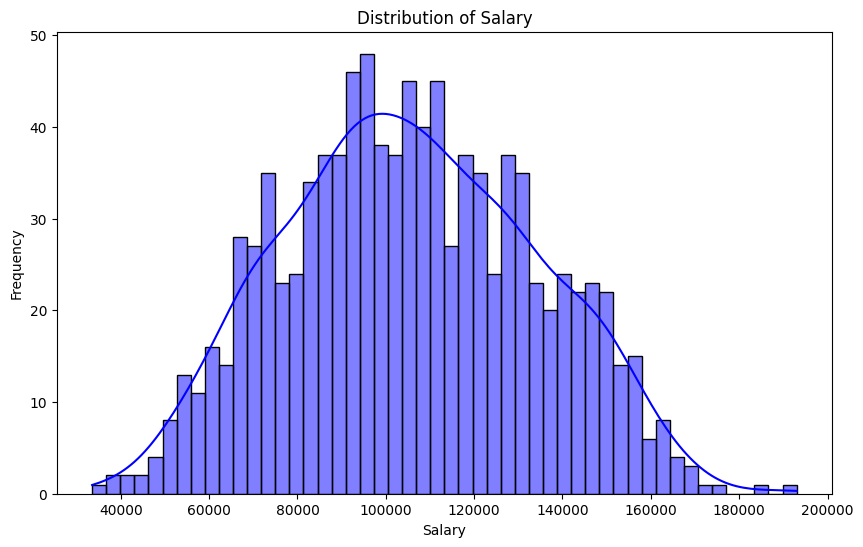

In [ ]:
#Seperate distribution for Salary because this is the target variable.

plt.figure(figsize=(10, 6))
sns.histplot(dt1['Salary'], color='blue', kde=True, bins=50)
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#Only numericals because better control in my hands.

correlation_matrix = dt1.corr(numeric_only=True)

In [ ]:
correlation_matrix

,Experience,Age,Salary
Experience,1.000000,0.044296,0.341918
Age,0.044296,1.000000,-0.053174
Salary,0.341918,-0.053174,1.000000


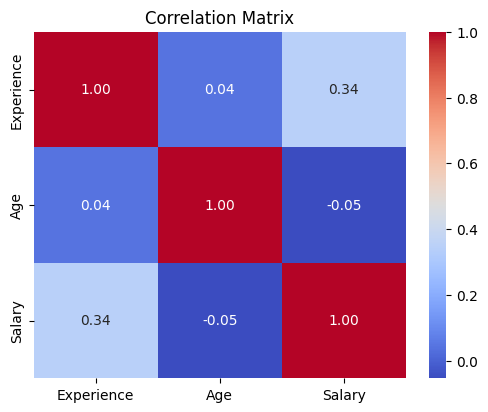

In [ ]:
#Showed correlation results in a heatmap.

correlation_matrix = dt1.corr(numeric_only=True)

plt.figure(figsize=(6, 4.5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#Time to turn those texutal values into numbers.

encoder = OneHotEncoder(sparse_output=False)
encoded_Education = encoder.fit_transform(dt1[['Education']])
encoded_Job_Title = encoder.fit_transform(dt1[['Job_Title']])
encoded_Location = encoder.fit_transform(dt1[['Location']])
encoded_Gender = encoder.fit_transform(dt1[['Gender']])

In [ ]:
encoded_Education

array([[0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [ ]:
encoded_Gender

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [ ]:
encoded_Location

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
encoded_Job_Title

array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

Add the old numerical values and the newly turned numerical values into one dataframe for operations later.


In [ ]:
#THIS WHOLE CODE TURNED OUT TO BE A DISASTER LATER

encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(dt1[['Education']])

encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Education']))

numeric_data = dt1.select_dtypes(include=['float64', 'int64'])
all_data = pd.concat([numeric_data, encoded_df], axis=1)

correlation_matrix = all_data.corr()

In [ ]:
#THIS WHOLE CODE TURNED OUT TO BE A DISASTER LATER

encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(dt1[['Location']])

encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Location']))

dt2 = dt1.select_dtypes(include=['float64', 'int64'])
all_data = pd.concat([numeric_data, encoded_df], axis=1)

correlation_matrix = all_data.corr()

In [ ]:
#THIS WHOLE CODE TURNED OUT TO BE A DISASTER LATER

encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(dt1[['Gender']])

encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Gender']))

numeric_data = dt1.select_dtypes(include=['float64', 'int64'])
all_data = pd.concat([numeric_data, encoded_df], axis=1)

correlation_matrix = all_data.corr()

In [ ]:
#THIS WHOLE CODE TURNED OUT TO BE A DISASTER LATER

encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(dt1[['Job_Title']])

encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Job_Title']))

numeric_data = dt1.select_dtypes(include=['float64', 'int64'])
all_data = pd.concat([numeric_data, encoded_df], axis=1)

correlation_matrix = all_data.corr()

In [ ]:
#Select numeric columns. I gave the numeric dataframe dt2 and the onehotencoded categorical dataframe dt3 as name.
dt2 = dt1.select_dtypes(include=['float64', 'int64'])

#Merge the categorical columns together.
encoder = OneHotEncoder(sparse_output=False)
encoded_cat = encoder.fit_transform(dt1[['Education', 'Location', 'Gender', 'Job_Title']])
dt3 = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(['Education','Location','Gender','Job_Title']))

#Combine numeric + encoded categorical.
all_data = pd.concat([dt2, dt3], axis=1)

#Correlation matrix.
correlation_matrix = all_data.corr()

Checked the new all_data set for any mistakes, null values, missing values.

In [ ]:
all_data.isnull().values.any()

np.False_

In [ ]:
missing_values = all_data.isnull().sum()

In [ ]:
missing_values

,0
Experience,0
Age,0
Salary,0
Education_Bachelor,0
Education_High School,0
Education_Master,0
Education_PhD,0
Location_Rural,0
Location_Suburban,0
Location_Urban,0


In [ ]:
all_data.shape

(1000, 16)

In [ ]:
len(all_data.columns)

16

In [ ]:
all_data.describe()

,Experience,Age,Salary,Education_Bachelor,Education_High School,Education_Master,Education_PhD,Location_Rural,Location_Suburban,Location_Urban,Gender_Female,Gender_Male,Job_Title_Analyst,Job_Title_Director,Job_Title_Engineer,Job_Title_Manager
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,14.771000,42.377000,105558.404239,0.253000,0.255000,0.241000,0.251000,0.345000,0.345000,0.310000,0.484000,0.516000,0.255000,0.275000,0.229000,0.241000
std,8.341111,13.609412,28256.972075,0.434948,0.436079,0.427904,0.433805,0.475606,0.475606,0.462725,0.499994,0.499994,0.436079,0.446738,0.420399,0.427904
min,1.000000,20.000000,33510.510669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,30.000000,85032.141517,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15.000000,43.000000,104314.518315,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,22.000000,55.000000,126804.047524,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,29.000000,64.000000,193016.602150,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
print(all_data)

     Experience  Age         Salary  Education_Bachelor  \
0             8   63   84620.053665                 0.0   
1            11   59  142591.255894                 0.0   
2            28   61   97800.255404                 1.0   
3            29   45   96834.671282                 0.0   
4            25   26  132157.786175                 0.0   
..          ...  ...            ...                 ...   
995           8   25   64683.389864                 0.0   
996          24   30   74468.205020                 0.0   
997          18   44   98207.026024                 0.0   
998          27   31  108544.922720                 1.0   
999          25   41   71077.000066                 0.0   

     Education_High School  Education_Master  Education_PhD  Location_Rural  \
0                      1.0               0.0            0.0             0.0   
1                      0.0               0.0            1.0             0.0   
2                      0.0               0.0          

In [ ]:
#Since no problems found, we shall continue with correlation matrix among all the features.

correlation_matrix

,Experience,Age,Salary,Education_Bachelor,Education_High School,Education_Master,Education_PhD,Location_Rural,Location_Suburban,Location_Urban,Gender_Female,Gender_Male,Job_Title_Analyst,Job_Title_Director,Job_Title_Engineer,Job_Title_Manager
Experience,1.000000,0.044296,0.341918,0.005777,-0.016403,-0.018457,0.028903,-0.091846,0.019935,0.073912,0.020602,-0.020602,-0.066214,0.001336,0.045514,0.021368
Age,0.044296,1.000000,-0.053174,-0.016299,0.075877,-0.013039,-0.047072,-0.011763,0.034322,-0.023187,-0.049055,0.049055,0.016169,-0.019868,-0.000758,0.005009
Salary,0.341918,-0.053174,1.000000,-0.225564,-0.594713,0.197899,0.628782,-0.176822,0.052549,0.127732,-0.028173,0.028173,-0.243538,0.327584,-0.160009,0.063392
Education_Bachelor,0.005777,-0.016299,-0.225564,1.000000,-0.340480,-0.327935,-0.336896,0.047010,-0.059446,0.012782,-0.002081,0.002081,-0.018551,-0.033872,0.049614,0.005524
Education_High School,-0.016403,0.075877,-0.594713,-0.340480,1.000000,-0.329670,-0.338679,0.029079,-0.043317,0.014634,0.039391,-0.039391,-0.036979,-0.010919,0.025144,0.024381
Education_Master,-0.018457,-0.013039,0.197899,-0.327935,-0.329670,1.000000,-0.326200,-0.064655,0.077984,-0.013700,-0.035764,0.035764,0.056568,-0.001440,-0.028874,-0.027777
Education_PhD,0.028903,-0.047072,0.628782,-0.336896,-0.338679,-0.326200,1.000000,-0.012590,0.026223,-0.014013,-0.002234,0.002234,-0.000026,0.046358,-0.046540,-0.002648
Location_Rural,-0.091846,-0.011763,-0.176822,0.047010,0.029079,-0.064655,-0.012590,1.000000,-0.526718,-0.486458,0.021131,-0.021131,0.038732,-0.032390,-0.065108,0.058310
Location_Suburban,0.019935,0.034322,0.052549,-0.059446,-0.043317,0.077984,0.026223,-0.526718,1.000000,-0.486458,0.033760,-0.033760,-0.004706,0.038279,0.030013,-0.064655
Location_Urban,0.073912,-0.023187,0.127732,0.012782,0.014634,-0.013700,-0.014013,-0.486458,-0.486458,1.000000,-0.056419,0.056419,-0.034973,-0.006053,0.036072,0.006522


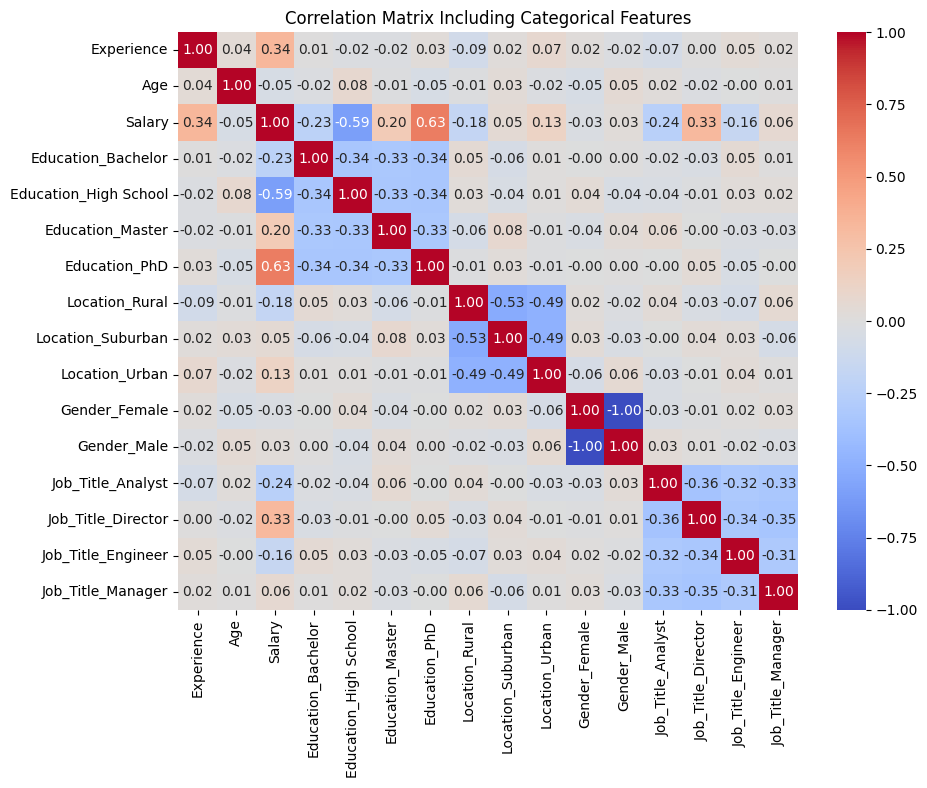

In [ ]:
# all_data contains numeric + all one-hot encoded categorical features

plt.figure(figsize=(10, 7.5))
sns.heatmap(all_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Including Categorical Features')
plt.show()

As we can see that there are not that many correlated features in this heatmap.

In [ ]:
all_data.to_csv('salary_prediction_data_3.csv', index=False)

In [ ]:
#Showed which is the target variable.

x = all_data.drop(columns=['Salary'])
y = all_data['Salary']

In [ ]:
#Scaled everything on X.

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [ ]:
#Split the data for testing and training by 80-20.

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

4 models were chosen for prediction and each of those will be fitted and deployed.

In [ ]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

mae, mse, rmse, mape, r2

(9337.13486555435,
 131132737.90038443,
 np.float64(11451.320356202792),
 0.09451294972340167,
 0.839401747537849)

In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

mae, mse, rmse, mape, r2

(8157.898478643166,
 105996277.66096848,
 np.float64(10295.44936663614),
 0.08199837746835449,
 0.8701863681609705)

In [ ]:
model = SVR()
model.fit(X_train, Y_train)

SVR()

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

mae, mse, rmse, mape, r2

(23106.098631970173,
 821917952.161135,
 np.float64(28669.111464451336),
 0.24845381521771498,
 -0.006602843026287886)

In [ ]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

mae, mse, rmse, mape, r2

(12031.991063549181,
 220213265.49982673,
 np.float64(14839.584411290862),
 0.12341707533392096,
 0.7303048332970696)

In [ ]:
#Optimization for Linear Regression

param_grid_ridge = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

ridge = Ridge()

grid_ridge = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='r2', n_jobs=-1)
grid_ridge.fit(X_train, Y_train)

print("Best Ridge Params:", grid_ridge.best_params_)
print("Best CV Score:", grid_ridge.best_score_)

Best Ridge Params: {'alpha': 1}
Best CV Score: 0.8732315301855209


In [ ]:
#Optimization for Random Forest Regressor

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)

grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='r2', n_jobs=-1)
grid_rf.fit(X_train, Y_train)

print("Best RF Params:", grid_rf.best_params_)
print("Best CV Score:", grid_rf.best_score_)

Best RF Params: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best CV Score: 0.8486725892341724


In [ ]:
#Optimization for SVR

param_grid_svr = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5, 1.0],
    'gamma': ['scale', 'auto']
}

svr = SVR()

grid_svr = GridSearchCV(svr, param_grid_svr, cv=5, scoring='r2', n_jobs=-1)
grid_svr.fit(X_train, Y_train)

print("Best SVR Params:", grid_svr.best_params_)
print("Best CV Score:", grid_svr.best_score_)

Best SVR Params: {'C': 100, 'epsilon': 1.0, 'gamma': 'scale', 'kernel': 'linear'}
Best CV Score: 0.8586226624032702


In [ ]:
#Optimization for Decision Tree Regressor

param_grid_dt = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt = DecisionTreeRegressor(random_state=42)

grid_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='r2', n_jobs=-1)
grid_dt.fit(X_train, Y_train)

print("Best DT Params:", grid_dt.best_params_)
print("Best CV Score:", grid_dt.best_score_)

Best DT Params: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best CV Score: 0.8022195012956164


After finishing optimization for all 4 models,
SVR and Decision Tree improved the most, with SVR going from very poor to strong (R² -0.0066 → 0.8586) and Decision Tree rising from 0.73 → 0.80. Ridge and Random Forest improved only slightly, showing the dataset is mostly linear.
Before optimization we had seen that the best model was Linear Regression. And after optimization it is still Linear Regression.

In [ ]:
#This shows the most important features that played roles in making the Linear Regression the most accurate model.

best_rf = grid_rf.best_estimator_

feature_importances = best_rf.feature_importances_

feat_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(feat_df)

                  Feature  Importance
5           Education_PhD    0.407947
4        Education_Master    0.190158
0              Experience    0.130907
12     Job_Title_Director    0.084355
3   Education_High School    0.052536
2      Education_Bachelor    0.033090
11      Job_Title_Analyst    0.026937
14      Job_Title_Manager    0.023796
1                     Age    0.016871
6          Location_Rural    0.011200
8          Location_Urban    0.010336
13     Job_Title_Engineer    0.006513
7       Location_Suburban    0.002028
9           Gender_Female    0.001734
10            Gender_Male    0.001592


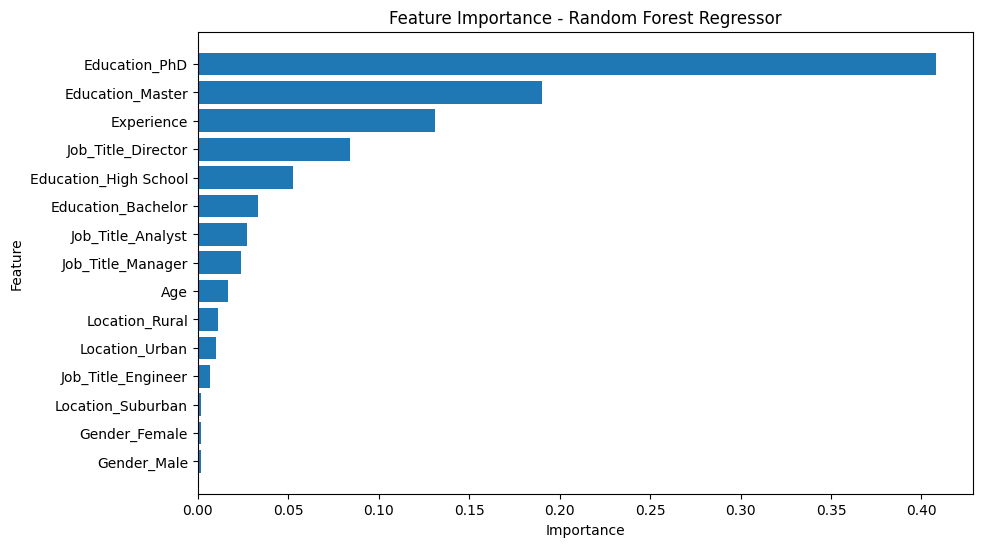

In [ ]:
plt.figure(figsize=(10,6))
plt.barh(feat_df['Feature'], feat_df['Importance'])
plt.gca().invert_yaxis()  # largest on top
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance - Random Forest Regressor")
plt.show()

After everything, we can see that the features, PhD from Education plays the most important part with over 40%. Right below that with 19% is Master from Education too. And after that Experience has the third most importance with 13%.